In [1]:
import pandas as pd

## Load the data and inspect basic properties

In [2]:
df = pd.read_parquet('../datasets/rees46_customer_model.parquet')
df.head()

,row_id,user_id,length_mean,start_year_mean,start_yearday_mean,start_month_mean,start_monthday_mean,start_week_mean,start_weekday_mean,start_isweekend_mean,...,purchase_latent_factor14,purchase_latent_factor15,purchase_latent_factor16,purchase_latent_factor17,target_event,target_revenue,target_customer_value,time_step,target_customer_value_lag1,target_actual_profit
0,31,522576412,10133.678750,2019.3250,241.65000,8.400000,16.875000,33.825000,4.225000,0.300000,...,0.633005,0.063525,0.000000,0.000000,0,3403.83,171.760358,0,90.148425,-13.279611
1,53,551695186,5.359195,2019.3620,222.05173,7.827586,14.655172,31.448277,4.034483,0.258621,...,0.395069,0.267275,0.000000,0.000000,1,0.00,387.102758,0,445.168171,3.592337
2,65,561472000,4.885714,2019.0000,297.54285,10.114285,21.000000,43.142857,2.942857,0.285714,...,0.000000,0.000000,0.000000,0.000000,1,0.00,347.097991,0,399.162689,3.216008
3,85,585643355,4175.082759,2019.8966,106.00000,3.931035,17.655172,15.896552,3.655172,0.206897,...,0.165644,0.000000,0.165603,0.263806,0,937.86,279.270244,0,321.607950,-13.185855
4,133,520792937,3.325601,2019.3196,212.86598,7.556701,13.711340,30.989690,3.958763,0.350515,...,0.000000,0.000000,0.048937,0.000000,1,0.00,91.360471,0,105.064542,0.732248


In [3]:
# Number of rows and columns
print(f"Shape of the dataset (rows, columns): {df.shape}")

# List of columns names
print("Columns in the dataset:")
print(df.columns.tolist())

Shape of the dataset (rows, columns): (112610, 276)
Columns in the dataset:
['row_id', 'user_id', 'length_mean', 'start_year_mean', 'start_yearday_mean', 'start_month_mean', 'start_monthday_mean', 'start_week_mean', 'start_weekday_mean', 'start_isweekend_mean', 'start_hour_mean', 'haspurchase_mean', 'click_count_mean', 'view_count_mean', 'cart_count_mean', 'purchase_count_mean', 'time_to_click_mean', 'time_to_view_mean', 'time_to_cart_mean', 'time_to_purchase_mean', 'view_revenue_mean', 'cart_revenue_mean', 'purchase_revenue_mean', 'time_to_click_revenue_mean', 'time_to_view_revenue_mean', 'time_to_cart_revenue_mean', 'time_to_purchase_revenue_mean', 'session_number_mean', 'inter_session_time_mean', 'session_recency_mean', 'purchase_number_mean', 'inter_purchase_time_mean', 'purchase_recency_mean', 'length_sum', 'start_year_sum', 'start_yearday_sum', 'start_month_sum', 'start_monthday_sum', 'start_week_sum', 'start_weekday_sum', 'start_isweekend_sum', 'start_hour_sum', 'haspurchase_sum

In [4]:
# Data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112610 entries, 0 to 112609
Columns: 276 entries, row_id to target_actual_profit
dtypes: float64(219), int64(57)
memory usage: 237.1 MB


In [5]:
"""
Check for missing values and duplicate rows.
Missing values and duplicates can bias the analysis and model training.
"""

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Missing values in each column:
row_id                        0
user_id                       0
length_mean                   0
start_year_mean               0
start_yearday_mean            0
                             ..
target_revenue                0
target_customer_value         0
time_step                     0
target_customer_value_lag1    0
target_actual_profit          0
Length: 276, dtype: int64
Number of duplicate rows: 0


## Load Data Dictionary

The data dictionary provides detailed information about each feature in the dataset, including feature names, descriptions, data types, and possible values. This reference document helps us understand the meaning and context of each column, which is essential for feature selection, data preprocessing, and interpreting analysis results.

In [6]:
# Load data dictionary
data_dict  = pd.read_csv('../datasets/rees46_data_dictionary.csv', encoding='latin1')
data_dict

,Set,Attribute,Description,Variable name
0,Dependent,churn event,No transaction in future period.,target_event
1,Dependent,retention campaign profit,Incremental profit in future period.,target_actual_profit
2,Recency,session recency,time duration from the last session [days],session_recency
3,Recency,purchase recency,time duration from the last transaction [days],purchase_recency
4,Recency,time to session,time between sessions [days],inter_session_time
5,Recency,time to purchase,time between purchases [days],inter_purchase_time
6,Frequency,session number,user-session number [n],session_number
7,Frequency,purchase number,user-purchase number [n],purchase_number
8,Frequency,session daily frequency *,session count per day,session_count_ratio
9,Frequency,interaction daily frequency *,interaction count per day,click_count_ratio


In [7]:
df['target_event'].value_counts()

target_event
0    76480
1    36130
Name: count, dtype: int64

In [8]:
df['target_actual_profit'].describe()

count    112610.000000
mean         -7.812736
std           8.470775
min         -13.587740
25%         -13.235331
50%         -13.145774
75%           0.887920
max         189.965710
Name: target_actual_profit, dtype: float64

## Calculate Correlation

Based on the [paper](https://link.springer.com/article/10.1007/s42452-025-07157-0#data-availability), there are too many redundant features in the dataset. This redundancy can also result in overfitting. To address these issues, the paper only uses 38 features out of 276 features and the features with high correlation coefficients are dropped. However, the paper does not specify the threshold for dropping features based on correlation coefficients.

In [9]:
import numpy as np

# Get correlation coefficients value to target_actual_profit
df_features = df.select_dtypes(include=['number']).drop(columns=['row_id', 'user_id', 'target_event', 'target_actual_profit'])

# Remove features with zero variance (constant values)
df_features_filtered = df_features.loc[:, df_features.var() != 0]

# Remove features with NaN correlation
df_features_filtered = df_features_filtered.dropna(axis=1, how='all')

In [10]:
# Calculate correlation with target variable
def calculate_correlation(df, df_target_column, threshold=(0.1, -0.1)):
	correlations = df.corrwith(df_target_column)

	# Filter features based on the threshold
	reduced_features = correlations[(correlations > threshold[0]) | (correlations < threshold[1])].index.tolist()
	df_reduced = df[reduced_features]
	print(f"Number of features after correlation filtering: {len(df_reduced.columns)}")
	
	return correlations, df_reduced, reduced_features

correlations, df_reduced, reduced_features = calculate_correlation(df_features_filtered, df['target_event'], threshold=(0.1, -0.1))

Number of features after correlation filtering: 48


In [11]:
correlations.sort_values(ascending=False)

session_recency_min          0.534438
purchase_recency_min         0.516597
session_recency_mean         0.477474
purchase_recency_mean        0.474895
purchase_recency_max         0.367690
                               ...   
purchase_recency_cv         -0.249613
purchase_count_month_lag0   -0.250551
target_revenue              -0.259221
session_recency_cv          -0.330524
time_step                   -0.347981
Length: 269, dtype: float64

In [12]:
df_reduced.columns

Index(['purchase_count_mean', 'session_recency_mean', 'purchase_number_mean',
       'inter_purchase_time_mean', 'purchase_recency_mean', 'haspurchase_sum',
       'click_count_sum', 'cart_count_sum', 'purchase_count_sum',
       'cart_revenue_sum', 'purchase_revenue_sum', 'inter_session_time_sum',
       'session_recency_sum', 'inter_purchase_time_sum',
       'purchase_recency_sum', 'start_weekday_min', 'start_hour_min',
       'session_recency_min', 'purchase_recency_min', 'start_monthday_max',
       'start_hour_max', 'purchase_count_max', 'session_recency_max',
       'purchase_number_max', 'purchase_recency_max', 'purchase_number_stddev',
       'session_number_cv', 'session_recency_cv', 'purchase_number_cv',
       'purchase_recency_cv', 'session_count_month_lag0',
       'session_count_month_lag1', 'purchase_count_month_lag0',
       'purchase_count_month_lag1', 'purchase_count_month_ma3',
       'purchase_revenue_month_lag0', 'customer_value_month_lag0',
       'view_latent_fa

## Segment the customers based on the reduced features

In [13]:
# Merge 'target_actual_profit' with the reduced features
df_reduced = df_reduced.copy()
df_reduced['target_event'] = df['target_event']
df_reduced.head()

,purchase_count_mean,session_recency_mean,purchase_number_mean,inter_purchase_time_mean,purchase_recency_mean,haspurchase_sum,click_count_sum,cart_count_sum,purchase_count_sum,cart_revenue_sum,...,view_latent_factor12,view_latent_factor16,view_latent_factor31,purchase_latent_factor2,purchase_latent_factor4,purchase_latent_factor10,purchase_latent_factor13,target_revenue,time_step,target_event
0,0.650000,93.046776,13.0,5.748443,86.240555,25,151,30,26,5027.45,...,0.000000,0.000000,0.000000,1.029801,0.0,0.000000,0.502957,3403.83,0,0
1,0.517241,99.118000,10.5,8.723447,100.179020,20,358,58,30,27843.11,...,0.000000,0.296150,0.000000,0.952375,0.0,1.085237,0.583373,0.00,0,1
2,1.142857,155.845550,12.0,0.785900,154.942000,23,229,59,40,23107.20,...,0.016058,0.000000,0.011787,0.789356,0.0,0.436771,1.177607,0.00,0,1
3,1.103448,20.168068,12.5,4.657785,17.992144,24,167,37,32,25528.46,...,0.000000,0.000000,0.000000,1.497121,0.0,0.602226,0.339103,937.86,0,0
4,0.659794,123.920490,31.0,2.169973,128.477250,61,484,111,64,21389.39,...,0.000000,0.068568,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0,1


### Implement Elbow Method to Find the Best K value

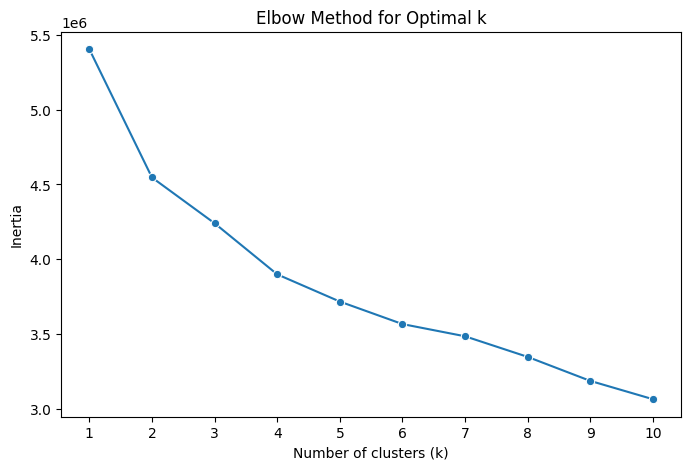

k=1, Inertia=5405280.000000001
k=2, Inertia=4546688.694844328
k=3, Inertia=4240264.229336018
k=4, Inertia=3898365.428718538
k=5, Inertia=3716206.5078842402
k=6, Inertia=3565654.1493864423
k=7, Inertia=3483813.77939115
k=8, Inertia=3345864.5401133145
k=9, Inertia=3185180.0034289863
k=10, Inertia=3062645.4271176057


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare data for clustering
X = df_reduced.drop(columns=['target_event']).copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement elbow method to find the optimal number of clusters
def elbow_method(X, n_init, max_k):
	inertia = []
	k_range = range(1, max_k + 1)

	for k in k_range:
		kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init)
		kmeans.fit(X)
		inertia.append(kmeans.inertia_)
	
	# Plot the elbow curve
	plt.figure(figsize=(8, 5))
	sns.lineplot(x=k_range, y=inertia, marker='o')
	plt.title('Elbow Method for Optimal k')
	plt.xlabel('Number of clusters (k)')
	plt.ylabel('Inertia')
	plt.xticks(k_range)
	plt.show()

	# Print inertia values for each k
	for k, inertia_value in zip(k_range, inertia):
		print(f'k={k}, Inertia={inertia_value}')

	return k_range, inertia

# Find optimal number of clusters using elbow method
k_range, inertias = elbow_method(X_scaled, n_init='auto', max_k=10)

### Elbow Point Rate of Change

In [15]:
# Calculate the rate of change to help identify the elbow point
def calculate_elbow_point(inertias):
	inertia_array = np.array(inertias)
	diff = np.diff(inertia_array)
	diff_2 = np.diff(diff)

	print("Range of change:")
	for i, (d1, d2) in enumerate(zip(diff, diff_2), start=2):
		print(f"K={i}, First diff={d1:.2f}, Second diff={d2:.2f}")

	elbow_idx = np.argmax(diff_2) + 2 # +2 because diff_2 starts from k=2
	return elbow_idx

optimal_k = calculate_elbow_point(inertias)
print(f"Optimal number of clusters (k) determined by elbow method: {optimal_k}")

Range of change:
K=2, First diff=-858591.31, Second diff=552166.84
K=3, First diff=-306424.47, Second diff=-35474.34
K=4, First diff=-341898.80, Second diff=159739.88
K=5, First diff=-182158.92, Second diff=31606.56
K=6, First diff=-150552.36, Second diff=68711.99
K=7, First diff=-81840.37, Second diff=-56108.87
K=8, First diff=-137949.24, Second diff=-22735.30
K=9, First diff=-160684.54, Second diff=38149.96
Optimal number of clusters (k) determined by elbow method: 2


### Segment with K-Means

In [16]:
# Implement KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the reduced dataframe
df_clustered = df_reduced.copy()
df_clustered['cluster'] = cluster_labels

### Analyze Cluster

Analyze cluster using the best optimum K.

In [17]:
def analyze_clusters(df_clustered, target_column='target_event'):
	# Cluster analysis
	cluster_sizes = df_clustered['cluster'].value_counts().sort_index()
	print("Cluster sizes:")
	for cluster, size in cluster_sizes.items():
		percentage = (size / len(df_clustered)) * 100
		print(f"  Cluster {cluster}: {size} customers ({percentage:.2f}%)")

	print("\n" + "="*50)

	# Analyze target_event distribution within each cluster
	print("Target event distribution within each cluster:")
	cluster_target_distribution = pd.crosstab(df_clustered['cluster'], df_clustered[target_column], normalize='index')
	print(cluster_target_distribution.round(3))

	print("\n" + "="*50)

	# Calculate cluster centroids in the original feature space
	feature_cols = [col for col in df_clustered.columns if col not in ['cluster', target_column]]
	centroids = df_clustered.groupby('cluster')[feature_cols].mean()

	print(f"\n Cluster centroids:")
	print(centroids)

	return cluster_sizes, cluster_target_distribution, centroids

cluster_sizes, cluster_target_distribution, centroids = analyze_clusters(df_clustered, target_column='target_event')

Cluster sizes:
  Cluster 0: 57730 customers (51.27%)
  Cluster 1: 54880 customers (48.73%)

Target event distribution within each cluster:
target_event      0      1
cluster                   
0             0.862  0.138
1             0.486  0.514


 Cluster centroids:
         purchase_count_mean  session_recency_mean  purchase_number_mean  \
cluster                                                                    
0                   0.646275             24.655554              6.244310   
1                   0.724562             74.165013             17.755695   

         inter_purchase_time_mean  purchase_recency_mean  haspurchase_sum  \
cluster                                                                     
0                        9.019605              23.736398        11.488637   
1                        3.771552              72.887771        34.511407   

         click_count_sum  cart_count_sum  purchase_count_sum  \
cluster                                              

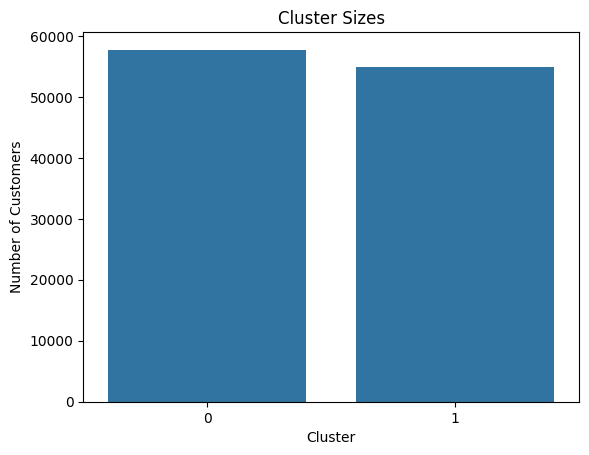

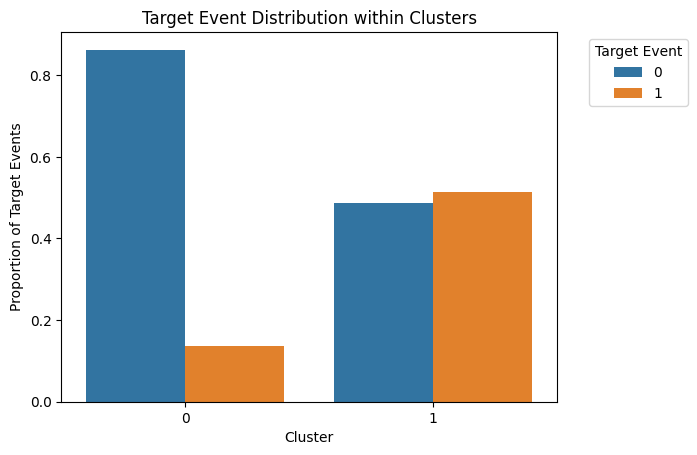

In [18]:
# Plot cluster sizes
sns.countplot(data=df_clustered, x='cluster', order=cluster_sizes.index)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Plot Target Event Distribution within Clusters
sns.barplot(data=cluster_target_distribution.reset_index().melt(id_vars='cluster'), x='cluster', y='value', hue='target_event')
plt.title('Target Event Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Target Events')
plt.legend(title='Target Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()